In [ ]:
#%% 1. Environment Setup
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings

In [5]:
df = pd.read_csv('D:/Projects/Deep Learning 101/gtzan_features.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,label
0,blues.00024.wav,661500,0.263108,0.099980,0.086962,0.002512,1120.390980,176408.836176,1447.852625,53821.613990,...,94.161580,-2.302590,68.893074,3.783148,76.785670,0.084823,73.574780,-0.939437,126.729645,blues
1,blues.00027.wav,661500,0.288705,0.094162,0.095725,0.002194,1391.443904,200153.143237,1494.850834,43500.503910,...,61.917267,-9.396027,85.992905,-2.562838,107.918915,-4.522896,59.029346,-0.262949,67.838790,blues
2,blues.00074.wav,661500,0.367174,0.085402,0.196903,0.004284,2515.869160,272550.358669,2531.420001,66559.812170,...,85.300290,12.328122,65.853590,-13.717032,65.636055,11.850821,70.903915,-3.982272,58.626965,blues
3,blues.00075.wav,661500,0.466458,0.081497,0.192030,0.008019,2225.176866,462553.522638,2255.135044,99000.271768,...,73.999756,15.339354,75.326546,-7.049362,83.158050,12.182225,61.919407,-6.110912,92.456580,blues
4,blues.00011.wav,661500,0.365807,0.102007,0.065685,0.002501,1353.329119,511903.711272,1757.331004,220219.000176,...,148.787000,6.566734,114.196280,-4.879438,93.832950,-3.180660,84.243774,-5.557003,65.379010,blues


In [6]:
df.shape

(999, 46)

In [7]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                       object
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [8]:
print(df.iloc[:, :-1])

            filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0    blues.00024.wav  661500          0.263108         0.099980  0.086962   
1    blues.00027.wav  661500          0.288705         0.094162  0.095725   
2    blues.00074.wav  661500          0.367174         0.085402  0.196903   
3    blues.00075.wav  661500          0.466458         0.081497  0.192030   
4    blues.00011.wav  661500          0.365807         0.102007  0.065685   
..               ...     ...               ...              ...       ...   
994    pop.00071.wav  661500          0.447408         0.092988  0.191373   
995    pop.00062.wav  661500          0.329643         0.098448  0.397851   
996    pop.00065.wav  661500          0.345651         0.097272  0.133485   
997    pop.00058.wav  661500          0.339939         0.098331  0.167422   
998    pop.00042.wav  661500          0.379730         0.090999  0.223442   

      rms_var  spectral_centroid_mean  spectral_centroid_var  \
0    0.0025

Epoch 1: 100%|██████████| 19/19 [00:00<00:00, 57.30it/s]


Epoch 1: Loss: 2.0018, Val Acc: 0.4300


Epoch 2: 100%|██████████| 19/19 [00:00<00:00, 90.37it/s]


Epoch 2: Loss: 1.3954, Val Acc: 0.5600


Epoch 3: 100%|██████████| 19/19 [00:00<00:00, 97.68it/s] 


Epoch 3: Loss: 1.0678, Val Acc: 0.5950


Epoch 4: 100%|██████████| 19/19 [00:00<00:00, 101.96it/s]


Epoch 4: Loss: 0.8620, Val Acc: 0.6050


Epoch 5: 100%|██████████| 19/19 [00:00<00:00, 92.51it/s]


Epoch 5: Loss: 0.7782, Val Acc: 0.5800


Epoch 6: 100%|██████████| 19/19 [00:00<00:00, 95.37it/s]


Epoch 6: Loss: 0.6694, Val Acc: 0.6400


Epoch 7: 100%|██████████| 19/19 [00:00<00:00, 100.68it/s]


Epoch 7: Loss: 0.5566, Val Acc: 0.6350


Epoch 8: 100%|██████████| 19/19 [00:00<00:00, 91.79it/s]


Epoch 8: Loss: 0.4666, Val Acc: 0.6550


Epoch 9: 100%|██████████| 19/19 [00:00<00:00, 105.36it/s]


Epoch 9: Loss: 0.4002, Val Acc: 0.6100


Epoch 10: 100%|██████████| 19/19 [00:00<00:00, 96.45it/s]


Epoch 10: Loss: 0.3245, Val Acc: 0.6500


Epoch 11: 100%|██████████| 19/19 [00:00<00:00, 90.37it/s]


Epoch 11: Loss: 0.2800, Val Acc: 0.6550


Epoch 12: 100%|██████████| 19/19 [00:00<00:00, 99.60it/s]


Epoch 12: Loss: 0.2342, Val Acc: 0.6900


Epoch 13: 100%|██████████| 19/19 [00:00<00:00, 107.86it/s]


Epoch 13: Loss: 0.1951, Val Acc: 0.6950


Epoch 14: 100%|██████████| 19/19 [00:00<00:00, 102.74it/s]


Epoch 14: Loss: 0.1621, Val Acc: 0.6950


Epoch 15: 100%|██████████| 19/19 [00:00<00:00, 101.16it/s]


Epoch 15: Loss: 0.1412, Val Acc: 0.6800


Epoch 16: 100%|██████████| 19/19 [00:00<00:00, 95.11it/s] 


Epoch 16: Loss: 0.1128, Val Acc: 0.6850


Epoch 17: 100%|██████████| 19/19 [00:00<00:00, 92.50it/s]


Epoch 17: Loss: 0.1016, Val Acc: 0.6700


Epoch 18: 100%|██████████| 19/19 [00:00<00:00, 98.85it/s]


Epoch 18: Loss: 0.0859, Val Acc: 0.6650


Epoch 19: 100%|██████████| 19/19 [00:00<00:00, 97.67it/s]


Epoch 19: Loss: 0.0718, Val Acc: 0.6850


Epoch 20: 100%|██████████| 19/19 [00:00<00:00, 94.23it/s]


Epoch 20: Loss: 0.0569, Val Acc: 0.6850


Epoch 21: 100%|██████████| 19/19 [00:00<00:00, 93.78it/s]


Epoch 21: Loss: 0.0606, Val Acc: 0.6900


Epoch 22: 100%|██████████| 19/19 [00:00<00:00, 94.86it/s]


Epoch 22: Loss: 0.0638, Val Acc: 0.6900


Epoch 23: 100%|██████████| 19/19 [00:00<00:00, 97.74it/s]


Epoch 23: Loss: 0.0560, Val Acc: 0.6850


Epoch 24: 100%|██████████| 19/19 [00:00<00:00, 100.68it/s]


Epoch 24: Loss: 0.0602, Val Acc: 0.6850


Epoch 25: 100%|██████████| 19/19 [00:00<00:00, 99.60it/s]


Epoch 25: Loss: 0.0554, Val Acc: 0.6850


Epoch 26: 100%|██████████| 19/19 [00:00<00:00, 100.83it/s]


Epoch 26: Loss: 0.0591, Val Acc: 0.6850


Epoch 27: 100%|██████████| 19/19 [00:00<00:00, 100.03it/s]


Epoch 27: Loss: 0.0559, Val Acc: 0.6850


Epoch 28: 100%|██████████| 19/19 [00:00<00:00, 98.31it/s]


Epoch 28: Loss: 0.0580, Val Acc: 0.6850


Epoch 29: 100%|██████████| 19/19 [00:00<00:00, 92.47it/s]


Epoch 29: Loss: 0.0533, Val Acc: 0.6850


Epoch 30: 100%|██████████| 19/19 [00:00<00:00, 102.84it/s]


Epoch 30: Loss: 0.0565, Val Acc: 0.6850
Best SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'} (Acc: 74.13%)
Test Acc: 72.00%


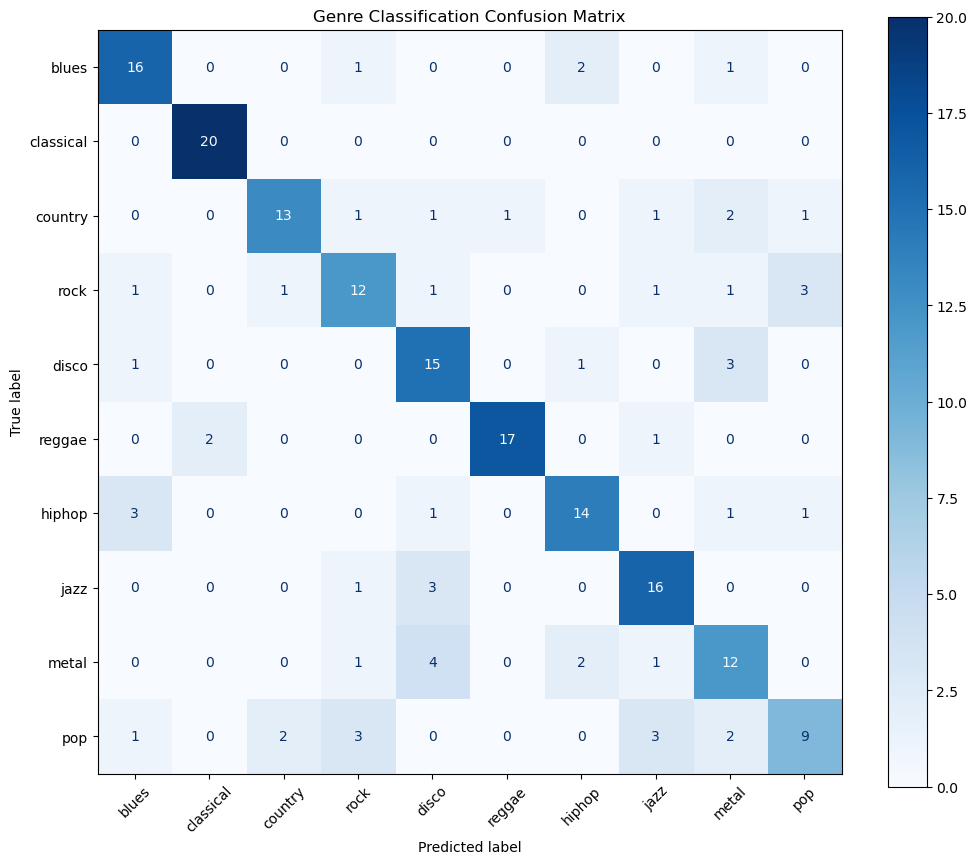

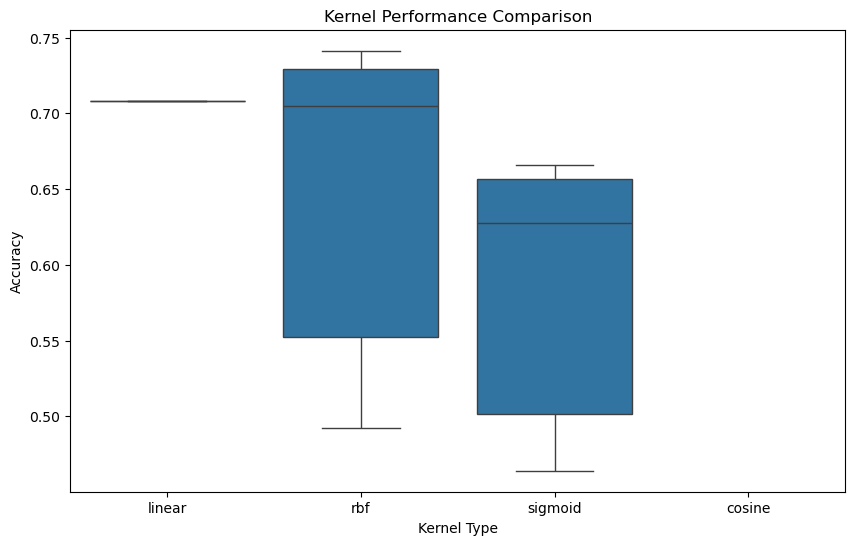

In [ ]:
warnings.filterwarnings("ignore")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#%% 2. Data Preparation
class AudioDataset(Dataset):
    def __init__(self, features, labels, filenames):
        self.features = features
        self.labels = labels
        self.filenames = filenames
        
    def __len__(self): return len(self.labels)
    
    def __getitem__(self, idx):
        return (self.features[idx], self.labels[idx], self.filenames[idx])

# Load and preprocess data
df = pd.read_csv('gtzan_features.csv')
df['tempo'] = df['tempo'].str.strip('[]').astype(float)
genres = ['blues', 'classical', 'country', 'rock', 'disco', 'reggae', 'hiphop', 'jazz', 'metal', 'pop']

le = LabelEncoder()
le.fit(genres)
df['label'] = le.transform(df['label'])

# Split data
X = df.drop(['label', 'filename'], axis=1)
y = df['label']
filenames = df['filename']

X_train_val, X_test, y_train_val, y_test, fn_train_val, fn_test = train_test_split(
    X, y, filenames, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val, fn_train, fn_val = train_test_split(
    X_train_val, y_train_val, fn_train_val, test_size=0.25, stratify=y_train_val, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Create datasets
def create_dataloader(features, labels, filenames, batch_size=32, shuffle=False):
    features = torch.tensor(features, dtype=torch.float32)
    labels = torch.tensor(labels.values, dtype=torch.long)
    dataset = AudioDataset(features, labels, filenames.values)
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

train_loader = create_dataloader(X_train, y_train, fn_train, shuffle=True)
val_loader = create_dataloader(X_val, y_val, fn_val)
test_loader = create_dataloader(X_test, y_test, fn_test)

#%% 3. TabTransformer Model
class TabTransformer(nn.Module):
    def __init__(self, num_features, num_classes, embed_dim=32, num_heads=4, 
                 ff_dim=128, num_layers=3, dropout=0.1):
        super().__init__()
        self.embedding = nn.Linear(1, embed_dim)
        self.pos_embedding = nn.Parameter(torch.randn(1, num_features, embed_dim))
        
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim, nhead=num_heads, dim_feedforward=ff_dim,
            dropout=dropout, activation='gelu', batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers)
        
        self.mlp = nn.Sequential(
            nn.Linear(embed_dim * num_features, ff_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(ff_dim, num_classes)
        )
        
    def forward(self, x, return_embeddings=False):
        x = x.unsqueeze(-1)
        x = self.embedding(x) + self.pos_embedding
        x = self.transformer(x)
        embeddings = x.view(x.size(0), -1)
        return self.mlp(embeddings) if not return_embeddings else embeddings

model = TabTransformer(
    num_features=X_train.shape[1],
    num_classes=len(genres)
).to(device)

#%% 4. Training Functionality
def train_model(model, train_loader, val_loader, epochs=30):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=3)
    best_acc = 0.0

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X_batch, y_batch, _ in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        # Validation
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for X_val, y_val, _ in val_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                outputs = model(X_val)
                _, predicted = torch.max(outputs.data, 1)
                total += y_val.size(0)
                correct += (predicted == y_val).sum().item()
        
        val_acc = correct / total
        scheduler.step(val_acc)
        
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), 'best_model.pth')
        
        print(f"Epoch {epoch+1}: Loss: {train_loss/len(train_loader):.4f}, Val Acc: {val_acc:.4f}")

train_model(model, train_loader, val_loader)

#%% 5. Embedding Extraction & SVM
def extract_embeddings(model, loader):
    model.eval()
    embeddings, labels, filenames = [], [], []
    with torch.no_grad():
        for X_batch, y_batch, fn_batch in loader:
            X_batch = X_batch.to(device)
            emb = model(X_batch, return_embeddings=True)
            embeddings.append(emb.cpu())
            labels.append(y_batch)
            filenames.extend(fn_batch)
    return torch.cat(embeddings).numpy(), torch.cat(labels).numpy(), filenames

X_train_emb, y_train_emb, fn_train = extract_embeddings(model, train_loader)
X_test_emb, y_test_emb, fn_test = extract_embeddings(model, test_loader)

# Automated Kernel Selection
param_grid = {
    'kernel': ['linear', 'rbf', 'sigmoid', 'cosine'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

svm = SVC()
clf = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)
clf.fit(X_train_emb, y_train_emb)

print(f"Best SVM: {clf.best_params_} (Acc: {clf.best_score_:.2%})")
print(f"Test Acc: {clf.score(X_test_emb, y_test_emb):.2%}")

#%% 6. Visualization
def plot_results(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=labels)
    fig, ax = plt.subplots(figsize=(12, 10))
    disp.plot(ax=ax, xticks_rotation=45, cmap='Blues')
    plt.title("Genre Classification Confusion Matrix")
    plt.show()

plot_results(y_test_emb, clf.predict(X_test_emb), genres)

# Kernel Comparison
results = pd.DataFrame(clf.cv_results_)
plt.figure(figsize=(10, 6))
sns.boxplot(x='param_kernel', y='mean_test_score', data=results)
plt.title("Kernel Performance Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Kernel Type")
plt.show()